In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
df = pd.read_csv('/Users/Sam/Downloads/Data-Preparation-07.csv')
print(df.shape)

/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/ipykernel_9677/2728453467.py:1: DtypeWarning: Columns (14,16,27,28,33,48,50,55,56,61,67,89,105,107,112,114,129,130,138,139,146,148,151,152,159,180,211,217,218,219,220,221,222,223,224) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Sam/Downloads/Data-Preparation-07.csv')


(2949338, 225)


In [43]:
irrelevant_columns = [
    # Climate Control & Cabin Features
    'is_climate_on', 'driver_temp_setting', 'passenger_temp_setting',
    'seat_heater_left', 'seat_heater_right', 'steering_wheel_heater',
    'side_mirror_heaters', 'fan_status', 'auto_seat_climate_left', 'auto_seat_climate_right',
    
    # Safety Systems & Warnings
    'sentry_mode', 'service_mode', 'valet_mode',
    'tpms_hard_warning_fl', 'tpms_hard_warning_fr', 'tpms_hard_warning_rl', 'tpms_hard_warning_rr',
    'tpms_last_seen_pressure_time_fl', 'tpms_last_seen_pressure_time_fr',
    'tpms_last_seen_pressure_time_rl', 'tpms_last_seen_pressure_time_rr',
    'tpms_pressure_fl', 'tpms_pressure_fr', 'tpms_pressure_rl', 'tpms_pressure_rr',
    'tpms_rcp_front_value', 'tpms_rcp_rear_value',
    'tpms_soft_warning_fl', 'tpms_soft_warning_fr', 'tpms_soft_warning_rl', 'tpms_soft_warning_rr',
    
    # Entertainment & Miscellaneous
    'webcam_selfie_supported', 'webcam_supported', 'santa_mode', 'notifications_supported',
    
    # Charging Scheduling (Detailed)
    'off_peak_charging_enabled', 'off_peak_hours_end_time', 'preconditioning_times',
    'charge_current_request', 'charge_current_request_max',  # Unnecessary charging diagnostics

    # Appearance & Vehicle Metadata
    'exterior_color', 'wheel_type', 'interior_trim_type',
    'roof_color', 'vehicle_name', 'car_special_type',

    # Diagnostic & Metadata
    'vehicle_self_test_progress',  # Unrelated to current features
    'vehicle_self_test_requested',  # Duplicate from diagnostics
    'dashcam_statesentry_mode',  # Specific to safety but not prioritized

    # Redundant and Granular Features
    'battery_energy_remaining',  # Not specified in battery recommendations
    'active_route_speed_limit_mph',  # Too detailed for route guidance

    # Other redundant or rarely used columns
    'valet_pin_needed',  # Unnecessary metadata
    'speed_limit_mode',  # Not related to current route guidance
    'steering_angle',  # Not specified for any recommendations
    'time_to_full_charge',  # Rarely referenced and redundant
    'service_interval_remaining',  # Unrelated to recommendations
    'powertrain_state'  # Too granular for high-level recommendations
]


In [44]:
# Drop the irrelevant columns
cleaned_data = df.drop(columns=irrelevant_columns, errors='ignore')

In [45]:
cleaned_data.shape

(2949338, 174)

In [46]:
cleaned_data.head()

,battery_heater_on,battery_level,battery_range,charge_amps,charge_enable_request,charge_energy_added,charge_limit_soc,charge_limit_soc_max,charge_limit_soc_min,charge_limit_soc_std,...,Folder Name,Folder Month,tpms_last_seen_pressure_time_fl_utc,tpms_last_seen_pressure_time_fl_utc_date_only,tpms_last_seen_pressure_time_fr_utc,tpms_last_seen_pressure_time_fr_utc_date_only,tpms_last_seen_pressure_time_rl_utc,tpms_last_seen_pressure_time_rl_utc_date_only,tpms_last_seen_pressure_time_rr_utc,tpms_last_seen_pressure_time_rr_utc_date_only
0,False,91.0,241.54,32.0,True,40.72,100,100,50,80,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30
1,False,91.0,241.54,32.0,True,40.72,100,100,50,80,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30
2,False,91.0,241.54,32.0,True,40.72,100,100,50,80,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30
3,False,91.0,241.54,32.0,True,40.72,100,100,50,80,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30
4,False,91.0,241.54,32.0,True,40.72,100,100,50,80,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30


In [47]:
df.head()

,battery_heater_on,battery_level,battery_range,charge_amps,charge_current_request,charge_current_request_max,charge_enable_request,charge_energy_added,charge_limit_soc,charge_limit_soc_max,...,Folder Name,Folder Month,tpms_last_seen_pressure_time_fl_utc,tpms_last_seen_pressure_time_fl_utc_date_only,tpms_last_seen_pressure_time_fr_utc,tpms_last_seen_pressure_time_fr_utc_date_only,tpms_last_seen_pressure_time_rl_utc,tpms_last_seen_pressure_time_rl_utc_date_only,tpms_last_seen_pressure_time_rr_utc,tpms_last_seen_pressure_time_rr_utc_date_only
0,False,91.0,241.54,32.0,32.0,32.0,True,40.72,100,100,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30
1,False,91.0,241.54,32.0,32.0,32.0,True,40.72,100,100,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30
2,False,91.0,241.54,32.0,32.0,32.0,True,40.72,100,100,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30
3,False,91.0,241.54,32.0,32.0,32.0,True,40.72,100,100,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30
4,False,91.0,241.54,32.0,32.0,32.0,True,40.72,100,100,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30


In [48]:
#1. Route and Driving Guidance
route_and_driving_guidance_columns = [
    'scheduled_departure_time',
    'active_route_minutes_to_arrival',
    'active_route_traffic_minutes_delay',
    'can_accept_navigation_requests',
    'gps_latitude',
    'gps_longitude',
    'navigation_state',
    'route_distance_remaining',
    'cruise_control_speed'
]


In [49]:
#2. Weather Recommendations
weather_recommendations_columns = [
    'ambient_temperature',
    'humidity',
    'rain_sensor',
    'wind_speed',
    'external_temperature'
]

In [50]:
#3. Battery
battery_columns = [
    'battery_heater_on',
    'battery_range',
    'charge_miles_added_ideal',
    'charge_port_cold_weather_mode',
    'charge_port_door_open',
    'fast_charger_present',
    'max_range_charge_counter',
    'state_of_charge',
    'energy_consumption_rate',
    'charging_power',
    'regen_energy_recovered',
    'vehicle_thermally_protected'
]


In [54]:
# Filter for columns that exist in the dataset
available_battery_columns = [col for col in battery_columns if col in df.columns]

# Extract the available battery-related data
battery_data = df[available_battery_columns]


Available battery columns: ['battery_heater_on', 'battery_range', 'charge_miles_added_ideal', 'charge_port_cold_weather_mode', 'charge_port_door_open', 'fast_charger_present', 'max_range_charge_counter']
   battery_heater_on  battery_range  charge_miles_added_ideal  \
0              False         241.54                     184.5   
1              False         241.54                     184.5   
2              False         241.54                     184.5   
3              False         241.54                     184.5   
4              False         241.54                     184.5   

  charge_port_cold_weather_mode charge_port_door_open fast_charger_present  \
0                         False                 False                False   
1                         False                 False                False   
2                         False                 False                False   
3                         False                 False                False   
4              

In [55]:
battery_data.head()

,battery_heater_on,battery_range,charge_miles_added_ideal,charge_port_cold_weather_mode,charge_port_door_open,fast_charger_present,max_range_charge_counter
0,False,241.54,184.5,False,False,False,0.0
1,False,241.54,184.5,False,False,False,0.0
2,False,241.54,184.5,False,False,False,0.0
3,False,241.54,184.5,False,False,False,0.0
4,False,241.54,184.5,False,False,False,0.0



Boolean Column Value Counts:
battery_heater_on:
battery_heater_on
False    2949203
True         135
Name: count, dtype: int64


Missing Value Counts:
battery_heater_on                     0
battery_range                         1
charge_miles_added_ideal              0
charge_port_cold_weather_mode    425194
charge_port_door_open              1533
fast_charger_present               1530
max_range_charge_counter              6
dtype: int64


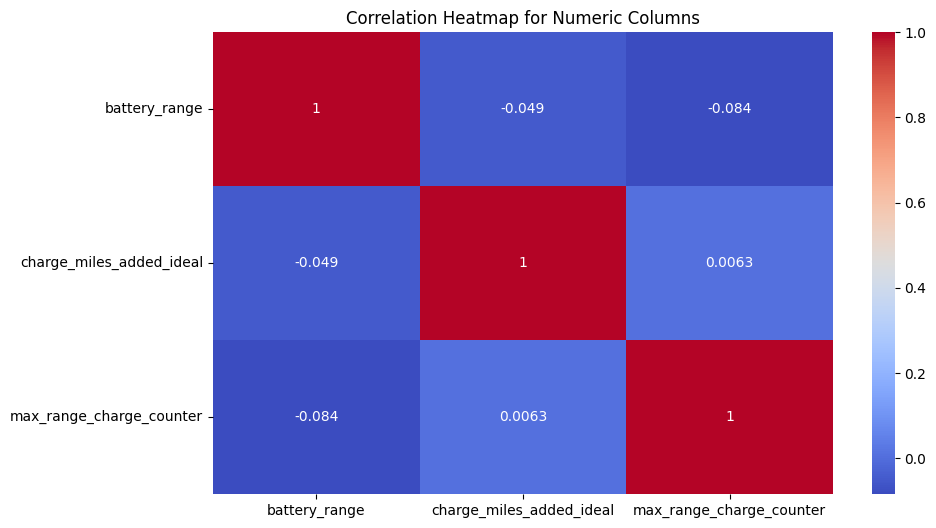

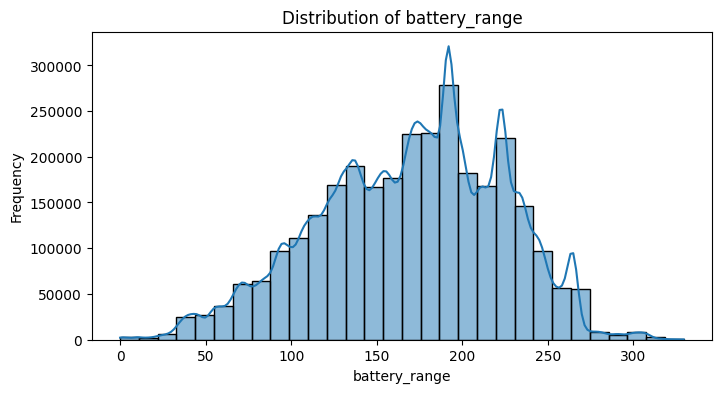

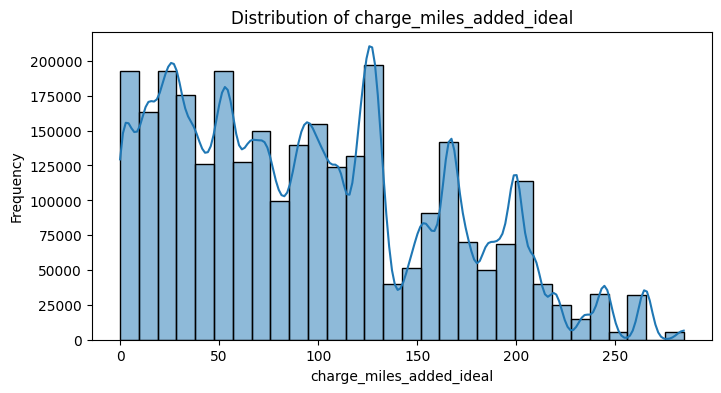

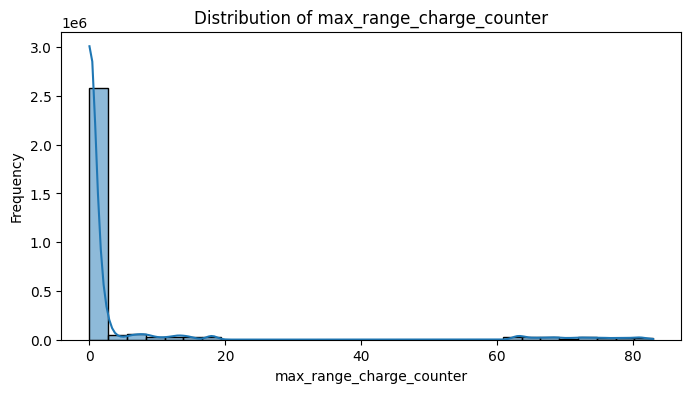

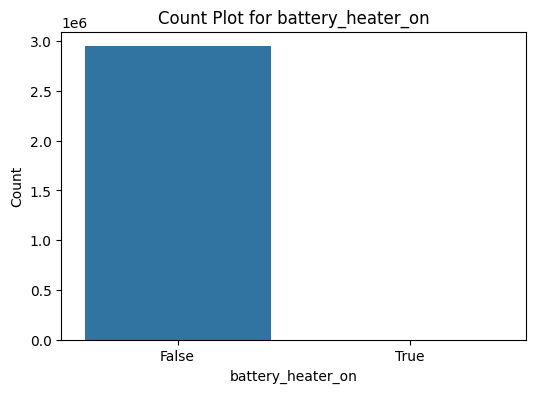

In [59]:
# 2. Boolean Column Counts
boolean_columns = battery_data.select_dtypes(include=['bool']).columns
if len(boolean_columns) > 0:
    print("\nBoolean Column Value Counts:")
    for col in boolean_columns:
        print(f"{col}:\n{battery_data[col].value_counts()}\n")

# 3. Missing Values
print("\nMissing Value Counts:")
print(battery_data.isnull().sum())

# 4. Correlation Heatmap for Numeric Columns
numeric_columns = battery_data.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_columns) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(battery_data[numeric_columns].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap for Numeric Columns")
    plt.show()

# 5. Distribution Plots for Numeric Columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(battery_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 6. Count Plots for Boolean Columns
for col in boolean_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=battery_data[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [51]:
#4. Event Recommendations
event_recommendations_columns = [
    'odometer',
    'location_history',
    'drive_mode',
    'navigation_suggestions'
]


In [52]:
#5. Cabin Environment
cabin_environment_columns = [
    'allow_cabin_overheat_protection',
    'bioweapon_mode',
    'defrost_mode',
    'side_mirror_heaters',
    'vehicle_self_test_requested',
    'cabin_temperature',
    'hvac_state',
    'seat_belt_status',
    'air_quality_index'
]


In [53]:
#6. Idle Time Detection
idle_time_detection_columns = [
    'shift_state',
    'speed',
    'power',
    'timestamp',
    'odometer',
    'engine_state',
    'fuel_consumption_rate',
    'duration_in_current_state',
    'gps_speed'
]
